<h1 align="center"> Homework 7 Programming Task</h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python, 2020 Spring </h3>
<h3 align="center"> Student: Apurv Saxena </h3>

**Instruction:**

Complete the following tasks and type your answers to questions directly on the jupyter notebook (2 points for each task and question, 24 points in total). You can add additional code lines if necessary.

In [1]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

# Task: Principal Component Analysis of the Wine Dataset

(1) Load Wine Dataset

The data file 'wine.data' is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The first column is the class of the wine, other columns are attributes of the winde. These columns are:

- 1) Class
- 2) Alcohol
- 3) Malic acid
- 4) Ash
- 5) Alcalinity of ash
- 6) Magnesium
- 7) Total phenols
- 8) Flavanoids
- 9) Nonflavanoid phenols
- 10) Proanthocyanins
- 11) Color intensity
- 12) Hue
- 13) OD280/OD315 of diluted wines
- 14) Proline

For detailed description of the dataset, refer to https://archive.ics.uci.edu/ml/datasets/Wine.

Create a pandas DataFrame from the data file. The data file itself does not include column names, so you need to manually set the column names for your DataFrame. Then show information of the dataset.

Tip: Set the header parameter of the pd.read_csv() function correctly so that the first row will not be treated as column header.

In [75]:
df_wine = pd.read_table("wine.data", sep=",", header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [76]:
df_wine.columns = ['Class',
                   'Alcohol',
                   'Malic acid',
                   'Ash',
                   'Alcalinity of ash',
                   'Magnesium',
                   'Total phenols',
                   'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity',
                   'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [77]:
df_wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

**Question 1**: How many observations are in the dataset? Does the dataset contain missing values?

Your Answer: 
             
             Number of observations 178 and Number of variables 14 
             
             The datset don't have any missing values.


(2) Sample observations

Randomly select 5 obvervations from the dataset and show them below.

In [78]:
df_wine.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
122,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.920,3.12,365
70,2,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.960,3.36,845
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.700,2.12,372
86,2,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.330,2.26,495


(3) Convert the value of Class variable

Convert Class integer values into strings by using the following mapping:

- 1: 'Class 1'
- 2: 'Class 2'
- 3: 'Class 3'

In [79]:
df_wine.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [81]:
df_wine['Class'] = df_wine.Class.astype(str)
df_wine.dtypes

Class                            object
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [82]:
df_wine['Class'] = df_wine['Class'].replace({'1': 'Class 1', '2': 'Class 2', '3': 'Class 3'})
df_wine.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
124,Class 2,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
15,Class 1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
65,Class 2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
153,Class 3,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
58,Class 1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285


(4) Normalize dataset

Standardize all columns except Class so that these columns have mean = 0 and standard error = 1.

In [91]:
data_norm = scale(df_wine.loc[:,'Alcohol':'Proline'])
type(data_norm)

numpy.ndarray

In [92]:
pd.DataFrame(data_norm).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,178.0,-8.382808e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
1,178.0,-1.197544e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
2,178.0,-8.370333e-16,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
3,178.0,-3.991813e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
4,178.0,-3.991813e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
5,178.0,0.000000e+00,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
6,178.0,-3.991813e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
7,178.0,3.592632e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
8,178.0,-1.197544e-16,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
9,178.0,3.492836e-17,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


(5) Principal component analysis with full components

In [93]:
pca1 = PCA(n_components=13)

pca1.fit(data_norm)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [94]:
var = pca1.explained_variance_ratio_

print(var)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [95]:
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 36.2   55.41  66.53  73.6   80.16  85.1   89.34  92.02  94.24  96.17
  97.91  99.21 100.01]


(6) Draw a scree plot to show the cumulative variance explained along the number of principal components.

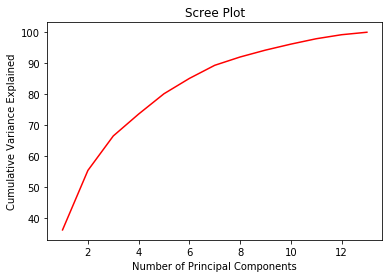

In [96]:
var1 = pd.DataFrame(var1, index=np.arange(1,14))
plt.plot(var1,color='red')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

**Question 2**: What is the least number of components we need to keep in order to keep 90% variance of the original predictors?

Your answer: 
From the above plot, we can see that if we choose a 9-component solution, the explained variance would be > 90%. That is to say, 9 orthogonal (uncorrelated) components will be able to keep more than 90% variance of the 13 variables in the original dataset. 

(7) Principal component analysis with two componenets.

In [122]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm)
data_pca2 = pca2.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
# data_pca2.index = df.name
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


(8) Run a correlation analysis on the dimension-reduced dataset.

In [98]:
data_pca2.corr()

,PC1,PC2
PC1,1.000000e+00,1.775882e-16
PC2,1.775882e-16,1.000000e+00


**Question 3**: What conclusion do you get from the correlation analysis?

Your answer:From the above correlation table, we can find that the pairwise correlations between two components are close to zeros. This means that all these components are orthogonal (not correlated). There is no multicollinearity among principal components.


(9) Plot wine class onto the reduced two-dimensional space.

With the two-component solution, draw a scatter plot to show the reduced dataset. Actually, one popular use of PCA is to reduce dimension to two, thus allowing plot a multi-dimensional data on a 2D space.

The scatter plot should use "Principal Component 1" as x axis, "Principal Component 2" as y axis. Use different colors to represent points for different classes of the wine.

A sample scatter plot can be found here:
https://mst.instructure.com/files/2002770/download?download_frd=1

You can refer to "Data Summarization and Visualization" jupyter notebook section 4.6 for scatter plot.

In [118]:
data_pca2.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


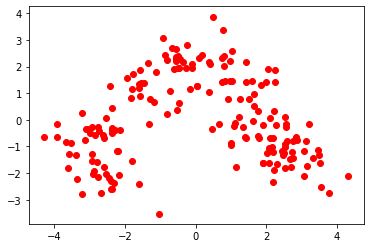

In [168]:
plt.scatter(data_pca2['PC1'], data_pca2['PC2'], color='red')

In [160]:
import seaborn as sns

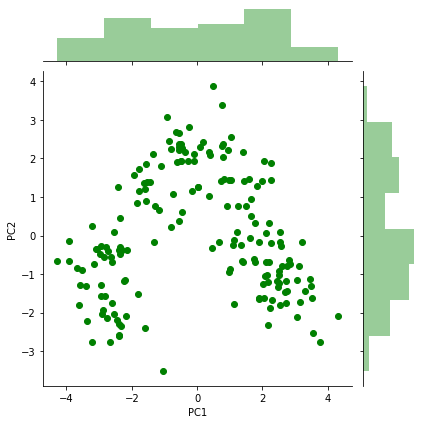

In [167]:
ax = sns.jointplot(x="PC1", y="PC2", data=data_pca2[['PC1','PC2']],color='g')

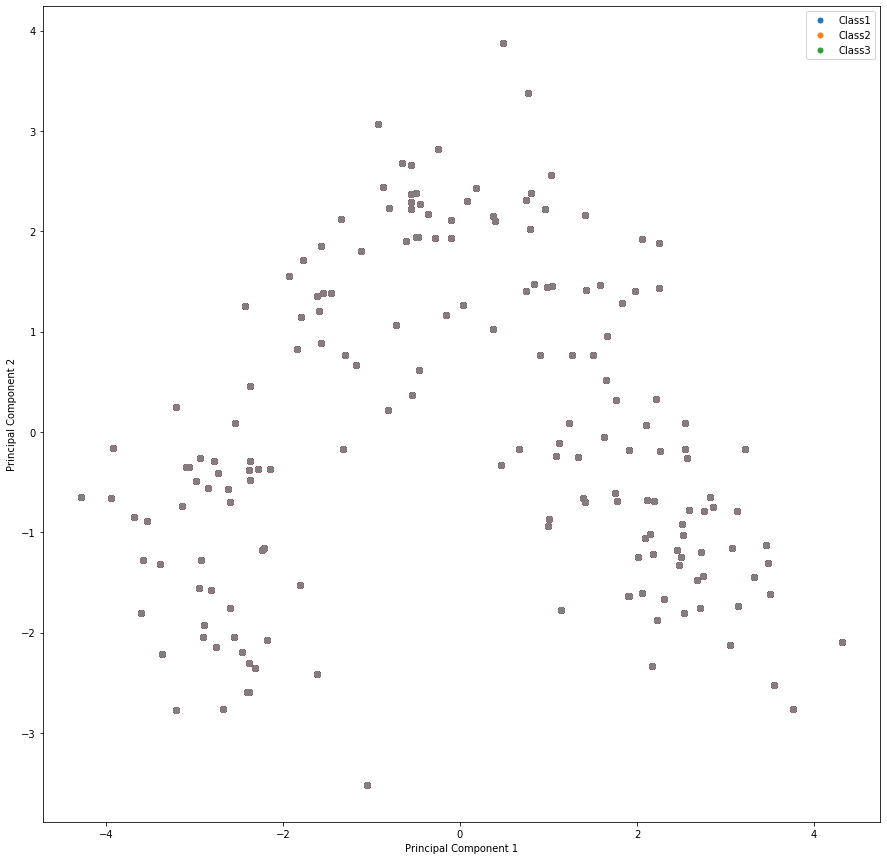

In [190]:
#plt.scatter(boston_df['LSTAT'], boston_df['Target'], color='black')
#plt.xlabel('% lower status of the population')
#plt.ylabel('house price')
# Generate grouped data first
#grouped = boston_df.groupby('CHAS')

# Then draw the plot by group
#fig, ax = plt.subplots()
#for name, group in grouped:
#    ax.plot(group.LSTAT, group.Target, marker='o', linestyle='', ms=5, label=name)
#ax.legend(['CHAS=0','CHAS=1'])
#plt.xlabel('% lower status of the population')
#plt.ylabel('house price')
#plt.show()

grouped = data_pca2.groupby('PC2')
fig, ax = plt.subplots(figsize=(15,15))
for name, group in grouped:
    ax.plot(data_pca2['PC1'], data_pca2['PC2'], marker='o', linestyle='', ms=5, label=name)

ax.legend(['Class1','Class2','Class3'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('2D_plot.png', dpi=300,bbox_inches='tight')

**Question 4**: According to the scatter plot shown above, are these two principal components good predictors for classifying wine class? Explain why.

Your answer: CA is commonly used in the field of pattern classification for feature selection (or dimensionality reduction).
By default, the transformed data will be ordered by the components with the maximum variance.

In the example above, I only kept the top 2 components (the 2 components with the maximum variance along the axes): The sample space of projected onto a 2-dimensional subspace, which was basically sufficient for plotting the data onto a 2D scatter plot.

However, if we want to use PCA for feature selection, we probably don’t want to reduce the dimensionality that drastically. By default, the PCA function (PCA(n_components=None)) keeps all the components in ranked order. So we could basically either set the number n_components to a smaller size then the input dataset, or we could extract the top n components later from the returned NumPy array.